In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import sys

In [2]:
#Input
#Constant
c=299792.459#km/s
#Iraf
corrhelio=25.68#km/s
#Theory Lambda
l=[6562.8,6548,6583,6717,6731]#AngstromsR
#l=[4861.36,4958.9,5006.9]#AngstromsB
#LimitData
min0=65
max0=145

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

In [3]:
inputf='604.Isis.WHT.Red.txt'

data0=pd.read_table(inputf)
data1=data0.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0",})

mr=(data1.X<max0)&(data1.X>min0)
data1=data1[mr]

In [4]:
for i in 0,2:
    Nx=i
    N=str(Nx)

    data2=data1[['X','Y','Center.'+N,'Peak.'+N,'Width.'+N]]

    RVo=c*(data2["Center."+N]-l[Nx])/l[Nx]
    RV=RVo+corrhelio

    data2=data2.assign(RV=RV.values)

    a=[data2.X,data2.Y,data2.RV,data2['Peak.'+N]]
    data3=pd.DataFrame(a).T
    data3.columns=['X','Y','RV','I']
    data3.to_csv('data'+str(int(l[Nx]))+'.csv')


In [5]:
datap='data6562.csv'

In [6]:
Ha=pd.read_csv(datap)
Ha=Ha.rename(columns={'Unnamed: 0':'No'})
Ha=Ha.drop('No',axis=1)
os.remove(datap)
Ha.describe()

,X,Y,RV,I
count,600.000000,600.000000,600.000000,600.000000
mean,105.269000,9.390000,-250.043594,2277.239467
std,23.243169,6.256047,10.420092,3750.107456
min,65.710000,0.000000,-277.593319,27.150000
25%,85.485000,4.000000,-257.836471,281.925000
50%,105.270000,9.000000,-249.888052,1017.500000
75%,125.045000,15.000000,-244.018098,2403.500000
max,144.830000,19.600000,-205.463695,30960.000000


In [7]:
#sosf

In [8]:
data=Ha.copy()

pc=1.0


df1=abs(data)#abs(data)?
df1n=df1.to_numpy()

xl=[row[0] for row in df1n]
yl=[row[1] for row in df1n]
fl=[row[2] for row in df1n]

x1=[xl]
y1=[yl]
f1=[fl]

x=list(map(list, zip(*x1)))
y=list(map(list, zip(*y1)))
f=list(map(list, zip(*f1)))

In [9]:
sig2=2
fm=np.nanmean(f)
fv=np.nanvar(f,ddof=1)
fs=np.nanstd(f,ddof=1)
l=len(f)
S=[[fm],[fv],[fs],[l]]

In [10]:
a=[[0]*(l) for i in range(l)]
b=[[0]*(l) for i in range(l)]
c=[[0]*(2) for i in range(l*l)]


#Normalized Second Order Structure Function Matrix [LxL]
for i in range(l):
    for j in range(l):
        if i > j:
            a[i][j]=(((f[j][0]-fm)-(f[i][0]-fm))**2)/(fv)

#Coord Matrix [LxL]
for i in range(l):
    for j in range(l):
        if i > j:
            b[i][j]=((x[i][0]-x[j][0])**2+(y[i][0]-y[j][0])**2)**0.5
 
#LxL to Lx2
#Main Matrix  [(L*L)x2]
for j in range (l):
    for i in range (l):
        c[i+j*(l)][1]=a[i][j]

for j in range (l):
    for i in range (l):
        c[i+j*(l)][0]=b[i][j]


In [11]:
#Filter: Greater than "0"
d=np.asarray(c)
ind=np.squeeze(d[:,1])>0.0
e=d[ind]
#Pandas Stuff
df=pd.DataFrame(e)
df.columns=['lag','qvd']#squared velocities difference
df.describe()

,lag,qvd
count,179450.000000,179450.000000
mean,28.999527,2.002786
std,17.838110,3.057966
min,1.340000,0.000019
25%,14.667409,0.192185
50%,25.446611,0.880131
75%,41.359556,2.532405
max,81.511560,47.916404


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


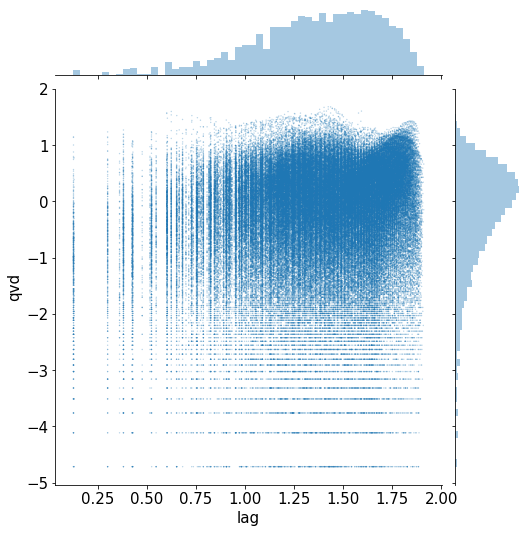

In [12]:
ax=sns.jointplot(x=np.log10(df.lag), y=np.log10(df.qvd), alpha=0.3, s=2, edgecolor='none')
ax.fig.set_size_inches(8,8)

In [13]:
#Main Filter Group
m=df.lag[1]-df.lag[0]#Lag step
n=int(df.lag.max()//df.lag.min())-1#Number of points
#Grouping points
dfx=dict()
for i in range(n):
    p=0+i*(m+0.001)#rs
    q=m+i*m
    dfx[i]=df[df['lag'].between(p,q)]
    
dfx

{0:          lag       qvd
 0       1.34  0.008475
 598     1.34  0.086272
 1196    1.34  0.529586
 2388    1.34  0.249764
 2983    1.34  0.040666
 ...      ...       ...
 179423  1.34  0.001557
 179436  1.34  0.008475
 179441  1.34  0.000307
 179447  1.34  0.007687
 179449  1.34  0.026310
 
 [527 rows x 2 columns], 1:              lag       qvd
 1       2.680000  0.148828
 59      2.300000  0.444025
 60      2.661879  0.078719
 599     2.680000  1.043354
 656     2.661879  0.575191
 ...          ...       ...
 179430  1.350000  0.016163
 179437  2.680000  0.005554
 179442  2.680000  0.000307
 179445  2.680000  0.007687
 179448  2.680000  0.062441
 
 [1937 rows x 2 columns], 2:              lag       qvd
 2       4.020000  1.239902
 61      3.531629  0.035535
 659     3.531629  3.214893
 1197    2.690000  2.819146
 1252    3.531629  1.106987
 ...          ...       ...
 179424  2.690000  0.007687
 179431  2.690000  0.048046
 179438  4.020000  0.005554
 179443  4.020000  0.011070
 17944

Main Matrix Statistical Properties Groups

In [14]:
lgp=dict()
lpc=dict()
dl=dict()
dery=dict()
dfm=dict()
dfv=dict()
dfs=dict()
derx=dict()
dlm=dict()
dlv=dict()
dls=dict()

for i in range(n):
    lgp[i]=(dfx[i]["lag"].max())
    lpc[i]=lgp[i]*pc
    dl[i]=len(dfx[i])#Numer of points each group
    #errorY
    dfm[i]=dfx[i]["qvd"].mean()
    dfv[i]=dfx[i]["qvd"].var()
    dfs[i]=dfx[i]["qvd"].std()
    if dl[i]>0:
        dery[i]=dfs[i]/np.sqrt(dl[i]-1)
    #errorX
    dlm[i]=dfx[i]["lag"].mean()
    dlv[i]=dfx[i]["lag"].var()
    dls[i]=dfx[i]["lag"].std()
    if dl[i]>0:
        derx[i]=dls[i]/np.sqrt(dl[i]-1)  


g=[[0]*(8) for i in range(n)]

for i in range(n):

    g[i][0]=lgp[i]
    g[i][1]=dfm[i]
    g[i][2]=dery[i]
    g[i][3]=dfs[i]
    g[i][4]=dfv[i]
    g[i][5]=lpc[i]
    g[i][6]=dl[i]
    g[i][7]=derx[i]


mx=[row[0] for row in g]
nx=[row[1] for row in g]
o=[row[2] for row in g]
mpc=[row[5] for row in g]

Power law calculation.

In [15]:
#Exponent

xa=[mx]
xe=list(map(list, zip(*xa)))
ya=[nx]
ye=list(map(list, zip(*ya)))

L=len(xe)

me=[[0]*(1) for i in range(L)]
ne=[[0]*(1) for i in range(L)]
oe=[[0]*(1) for i in range(L)]
pe=[[0]*(1) for i in range(L)]
qe=[[0]*(1) for i in range(L)]
re=[[0]*(1) for i in range(L)]
se=[[0]*(1) for i in range(L)]
te=[[0]*(1) for i in range(L)]
ue=[[0]*(1) for i in range(L)]
we=[[0]*(1) for i in range(L)]

for i in range (L):
    me[i][0]=math.log10(xe[i][0])
    ne[i][0]=math.log10(ye[i][0])
    oe[i][0]=(me[i][0]*ne[i][0])
    pe[i][0]=(me[i][0])**2

def sumColumn(a):
    return [sum(col) for col in zip(*a)]

for i in range (L+1):
    if i>0:
        qe[i-1]=sumColumn(me[:i])
        re[i-1]=sumColumn(ne[:i])
        se[i-1]=sumColumn(oe[:i])
        te[i-1]=sumColumn(pe[:i])
        ue[i-1][0]=len(x[:i])
    else:
        we[0][0]=0

for i in range (L):
    if i>0:
        we[i][0]=((qe[i][0]*re[i][0])-(ue[i][0]*se[i][0]))/((qe[i][0])**2-ue[i][0]*te[i][0])
    else:
        we[0][0]=0

In [16]:
A=[xe,ye,me,ne,oe,pe,qe,re,se,te,ue,we]
dfe=pd.DataFrame(A)
dfet=dfe.transpose()
dfet.columns=['Lag.x','Nmqvd.y','Logx','Logy','Logx*Logy','Logx^2','SumLogx','SumLogy','Sum','Sum','N','Exp']
dfet.head()


,Lag.x,Nmqvd.y,Logx,Logy,Logx*Logy,Logx^2,SumLogx,SumLogy,Sum,Sum,N,Exp
0,[1.3400000000000034],[0.33860156116805135],[0.12710479836480873],[-0.4703110438493311],[-0.05977879039721194],[0.016155629767358685],[0.12710479836480873],[-0.4703110438493311],[-0.05977879039721194],[0.016155629767358685],[1],[0]
1,[2.680000000000007],[0.6642347976951753],[0.42813479402878996],[-0.17767837647756435],[-0.07607029511659182],[0.1832994018580744],[0.5552395923935987],[-0.6479894203268954],[-0.13584908551380376],[0.19945503162543307],[2],[0.9721046792241003]
2,[4.02000000000001],[0.8494487278972823],[0.6042260530844712],[-0.070862829700513],[-0.04281716790033801],[0.3650891232260382],[1.1594656454780699],[-0.7188522500274084],[-0.17866625341414177],[0.5645441548514712],[3],[0.8517311114550523]
3,[5.360000000000014],[0.9866424516195101],[0.7291647896927711],[-0.005840202367220653],[-0.004258469930857671],[0.5316812905277031],[1.888630435170841],[-0.724692452394629],[-0.18292472334499946],[1.0962254453791744],[4],[0.7787229184930494]
4,[6.700000000000017],[1.1488817005909635],[0.8260748027008276],[0.06027531204287288],[0.04979191650354703],[0.6823995796572112],[2.7147052378716685],[-0.6644171403517561],[-0.13313280684145243],[1.7786250250363858],[5],[0.7469853699675187]


In [17]:
exp=we
ft=np.append(g,we, axis=1)
sf=pd.DataFrame(ft)
sf.columns=['Lag','Nmqvd','ErrY','StD','Var','Lag pc','# P','ErrX','Exp']
sf.head()

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp
0,1.34,0.338602,0.050896,1.167291,1.362568,1.34,527.0,6.016082e-16,0.000000
1,2.68,0.664235,0.038298,1.685110,2.839595,2.68,1937.0,6.862265e-03,0.972105
2,4.02,0.849449,0.047512,2.076425,4.311539,4.02,1911.0,8.921643e-03,0.851731
3,5.36,0.986642,0.039987,2.277480,5.186916,5.36,3245.0,6.993702e-03,0.778723
4,6.70,1.148882,0.032803,2.200024,4.840105,6.70,4499.0,6.495173e-03,0.746985


Text(0.5, 0, 'lag (arcsec)')

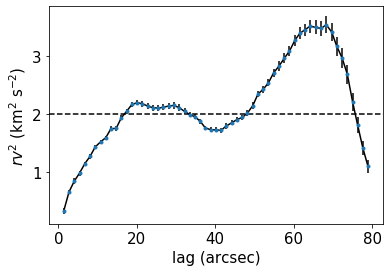

In [18]:
plt.plot(sf['Lag'],sf['Nmqvd'],color='k', alpha=1)
plt.errorbar(sf['Lag'],sf['Nmqvd'],xerr=sf.ErrX,yerr=sf.ErrY, fmt=".", ecolor='k')
plt.axhline(y=sig2, color='k', linestyle='--')
plt.ylabel(r'$rv^2\ (\mathrm{km^2\ s^{-2}})$')
plt.xlabel('lag (arcsec)')

Text(0.5, 0, 'lag (arcsec)')

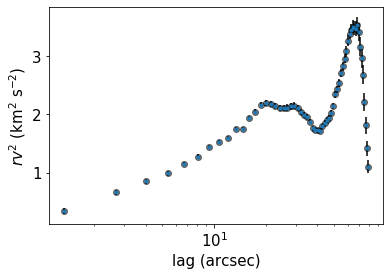

In [19]:
plt.scatter(sf['Lag'],sf['Nmqvd'],color='k', alpha=0.5)
plt.errorbar(sf['Lag'],sf['Nmqvd'],xerr=sf.ErrX,yerr=sf.ErrY, fmt=".", ecolor='k')
plt.xscale("log")
plt.ylabel(r'$rv^2\ (\mathrm{km^2\ s^{-2}})$')
plt.xlabel('lag (arcsec)')

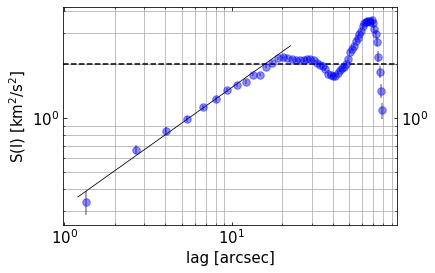

In [20]:
fig, ax=plt.subplots()
ax.errorbar(sf['Lag'],sf['Nmqvd'],xerr=sf.ErrX,yerr=sf.ErrY, fmt="o",color='b', ecolor='k', alpha=0.45, markersize=7.5)
ax.set(xscale='log',yscale='log')
ax.axhline(y=sig2, color='k', linestyle='--')
sgrid = np.logspace(.08, 1.35)
ax.plot(sgrid, 0.32*sgrid**(2/3), color="k", lw=0.8)
ax.set(xlabel='lag [arcsec]', ylabel=r'S(l) [km$^{2}$/s$^{2}$]')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.grid(which='minor')
